# Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Problem statement
We are interested in finding the mean temperature of the current day given the climate data of the previous $N$ days. 

Our data is obtained from parsing HTML of World Weather Online, with a case study of Ho Chi Minh City, Vietnam from 01/01/2009 to 21/12/2020

# 1. Preprocessing Data

### Data description

|Attribute|Explanation|Unit|
|:---:|:---:|:---:|
|**Date**|date with format `YYYY/MM/DD`|   |
|**Weather**|general description of current day's weather|categorical|
|**Mean**|mean temperature of current day, **created from `weather_full_df.csv` because `weather.csv` does not have mean temperature.** |Celcius degree (°c)|
|**Max**|maximum temperature of current day|Celcius degree (°c)|
|**Min**|minimum temperature of current day|Celcius degree (°c)|
|**Wind**|average wind speed|kilometer per hour (km/h)|
|**Direction**|direction of the wind|categorical|
|**Rain**|average amount of rainfall of current day|millimeter (mm)|
|**Humidity**|average percentage of humidity of current day|percentage (%)|
|**Cloud**|average percentage of cloudiness of current day|percentage (%)|
|**Pressure**|average amount of pressure of current day|millibar (mb)|

## 1.1. Create `mean temperature` attribute 

In [2]:
weather_full_df = pd.read_csv("weather_full_df.csv")
weather_full_df.head()

Time        Weather   Temp  Feels             Wind     Gust  \
0  2009-01-01 00:00:00            Fog  23 °c  25 °c  9 km/h from NNW  15 km/h   
1  2009-01-01 03:00:00  Light drizzle  22 °c  25 °c  9 km/h from NNW  13 km/h   
2  2009-01-01 06:00:00            Fog  22 °c  25 °c    6 km/h from N   8 km/h   
3  2009-01-01 09:00:00         Cloudy  27 °c  31 °c  6 km/h from NNE   7 km/h   
4  2009-01-01 12:00:00  Partly cloudy  28 °c  34 °c   3 km/h from NE   3 km/h   

     Rain Humidity Cloud Pressure        Vis  
0  0.0 mm      97%  100%  1010 mb       Poor  
1  0.4 mm      97%   84%  1010 mb       Poor  
2  0.0 mm      98%  100%  1011 mb       Poor  
3  0.1 mm      83%   64%  1011 mb  Excellent  
4  0.0 mm      76%   62%  1010 mb  Excellent

In [3]:
meantemp_df = weather_full_df[['Time', 'Temp']]
meantemp_df['Time'] = pd.to_datetime(meantemp_df['Time'])
meantemp_df['Temp'] = meantemp_df['Temp'].map(lambda x: x[:-3])
meantemp_df['Temp'] = meantemp_df['Temp'].astype(int)

<ipython-input-3-7ebbc20ae91e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meantemp_df['Time'] = pd.to_datetime(meantemp_df['Time'])
<ipython-input-3-7ebbc20ae91e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meantemp_df['Temp'] = meantemp_df['Temp'].map(lambda x: x[:-3])
<ipython-input-3-7ebbc20ae91e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [4]:
meantemp_df = meantemp_df.groupby([meantemp_df['Time'].dt.date]).mean().reset_index()
meantemp_df['Time'] = pd.to_datetime(meantemp_df['Time'])
meantemp_df.columns = ['Date', 'Mean']
meantemp_df.head()

Date    Mean
0 2009-01-01  24.500
1 2009-01-02  24.000
2 2009-01-03  22.375
3 2009-01-04  23.375
4 2009-01-05  24.875

## 1.2. Load summarized data

In [5]:
weather_df = pd.read_csv("weather.csv")

In [6]:
weather_df.head()

Date                        Weather    Max    Min    Wind Direction  \
0  2009-01-01  Moderate or heavy rain shower  28 °c  22 °c  6 km/h        SE   
1  2010-01-01                          Sunny  33 °c  23 °c  5 km/h         E   
2  2011-01-01                         Cloudy  29 °c  23 °c  4 km/h         S   
3  2012-01-01           Patchy rain possible  32 °c  23 °c  7 km/h         E   
4  2013-01-01                  Partly cloudy  32 °c  23 °c  4 km/h        SE   

     Rain Humidity Cloud Pressure  
0  5.2 mm      89%   74%  1010 mb  
1  0.0 mm      60%   18%  1010 mb  
2  0.0 mm      81%   41%  1008 mb  
3  1.0 mm      76%   40%  1012 mb  
4  0.0 mm      69%   15%  1010 mb

## 1.3. Preprocess

### a. Filter data: remove units in data.

In [7]:
weather_df['Max'] = weather_df['Max'].map(lambda x: x[:-3])
weather_df['Min'] = weather_df['Min'].map(lambda x: x[:-3])
weather_df['Wind'] = weather_df['Wind'].map(lambda x: x[:-5])
weather_df['Rain'] = weather_df['Rain'].map(lambda x: x[:-3])
weather_df['Humidity'] = weather_df['Humidity'].map(lambda x: x[:-1])
weather_df['Cloud'] = weather_df['Cloud'].map(lambda x: x[:-1])
weather_df['Pressure'] = weather_df['Pressure'].map(lambda x: x[:-3])

In [8]:
weather_df.head()

Date                        Weather Max Min Wind Direction Rain  \
0  2009-01-01  Moderate or heavy rain shower  28  22    6        SE  5.2   
1  2010-01-01                          Sunny  33  23    5         E  0.0   
2  2011-01-01                         Cloudy  29  23    4         S  0.0   
3  2012-01-01           Patchy rain possible  32  23    7         E  1.0   
4  2013-01-01                  Partly cloudy  32  23    4        SE  0.0   

  Humidity Cloud Pressure  
0       89    74     1010  
1       60    18     1010  
2       81    41     1008  
3       76    40     1012  
4       69    15     1010

### b. Convert to correct type data of columns

In [9]:
# Check types
weather_df.dtypes

Date         object
Weather      object
Max          object
Min          object
Wind         object
Direction    object
Rain         object
Humidity     object
Cloud        object
Pressure     object
dtype: object

We propose converting these attributes from `object` to their equivalent datatypes:

|Attribute|Proposed datatype|
|:---:|:---:|
|**Date**|datetime|
|**Weather**|string (or object)|
|**Max**|float|
|**Min**|float|
|**Wind**|float|
|**Direction**|string (or object)|
|**Rain**|float|
|**Humidity**|float|
|**Cloud**|float|
|**Pressure**|float|

In [10]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'])
weather_df['Max'] = weather_df['Max'].astype(float)
weather_df['Min'] = weather_df['Min'].astype(float)
weather_df['Wind'] = weather_df['Wind'].astype(float)
weather_df['Rain'] = weather_df['Rain'].astype(float)
weather_df['Humidity'] = weather_df['Humidity'].astype(float)
weather_df['Cloud'] = weather_df['Cloud'].astype(float)
weather_df['Pressure'] = weather_df['Pressure'].astype(float)

#### Merge mean temperature into data

In [11]:
weather_df = pd.merge(meantemp_df, weather_df, how='inner')
weather_df.head()

Date    Mean                        Weather   Max   Min  Wind  \
0 2009-01-01  24.500  Moderate or heavy rain shower  28.0  22.0   6.0   
1 2009-01-02  24.000                         Cloudy  28.0  21.0   9.0   
2 2009-01-03  22.375              Patchy light rain  24.0  21.0   6.0   
3 2009-01-04  23.375                  Partly cloudy  28.0  20.0   4.0   
4 2009-01-05  24.875                  Partly cloudy  30.0  21.0   5.0   

  Direction  Rain  Humidity  Cloud  Pressure  
0        SE   5.2      89.0   74.0    1010.0  
1        NE   0.1      83.0   59.0    1011.0  
2         E   2.2      88.0   64.0    1012.0  
3       SSE   0.0      83.0   40.0    1011.0  
4       ESE   0.0      77.0   28.0    1011.0

In [12]:
weather_df.dtypes

Date         datetime64[ns]
Mean                float64
Weather              object
Max                 float64
Min                 float64
Wind                float64
Direction            object
Rain                float64
Humidity            float64
Cloud               float64
Pressure            float64
dtype: object

### Check brief info of data
- Shape of data
- Check NULL value 
- Check duplicated rows 

To handle NULL value, we may drop rows with NULL or replace NULL with mean value of those attribute. In our case, we choose to drop NULL values of each attribute.

To handle duplication, we simply drop duplicated rows and only keep their first occurences.

In [13]:
# Shape of data 
weather_df.shape

(4369, 11)

In [14]:
# Check NULL value
weather_df.isna().sum()

Date         0
Mean         0
Weather      0
Max          0
Min          0
Wind         0
Direction    0
Rain         0
Humidity     0
Cloud        0
Pressure     0
dtype: int64

In [15]:
# Check duplicated 
weather_df.index.duplicated().sum()

0

# 2.EDA

## 2.1.Category Type

#### Wind Direction
There are 16 direction:
- N = North (349 - 011 degrees)
- NNE = North-Northeast (012-033 degrees)
- NE = Northeast (034-056 degrees)
- ENE = East-Northeast (057-078 degrees)
- E = East (079-101 degrees)
- ESE = East-Southeast (102-123 degrees)
- SE = Southeast (124-146 degrees)
- SSE = South-Southeast (147-168 degrees)
- S = South (169-191 degrees)
- SSW = South-Southwest (192-213 degrees)
- SW = Southwest (214-236 degrees)
- WSW = West-Southwest (237-258 degrees)
- W = West (259-281 degrees)
- WNW = West-Northwest (282-303 degrees)
- NW = Northwest (304-326 degrees)
- NNW = North-Northwest (327-348 degrees)


ref: https://www7.ncdc.noaa.gov/climvis/help_wind.html

In [16]:
direction = weather_df.Direction.value_counts()
direction

WSW    694
SE     664
ESE    603
SW     526
SSE    393
E      388
SSW    330
S      249
W      220
ENE    155
WNW     66
NE      38
NW      23
NNE     12
NNW      8
Name: Direction, dtype: int64

In [17]:
weather_df.Direction.nunique()

15

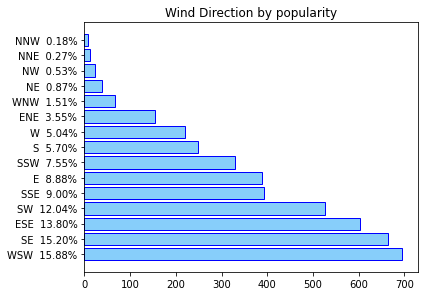

In [18]:
total = len(weather_df)
langs = direction.index
percent = direction/total*100
new_labels = [i+'  {:.2f}%'.format(j) for i, j in zip(langs, percent)]

plt.barh(langs, direction, color='lightskyblue', edgecolor='blue')
plt.yticks(range(len(langs)), new_labels)
plt.tight_layout()
plt.title('Wind Direction by popularity')
plt.show()

##### **Conclusion about Wind Direction in Ho Chi Minh City**
- There are 15/16 wind directions in Ho Chi Minh City, and the missing direction there is **North**.
- The most popular wind directions are South-related ones: West-Southwest and Southeast
- The least popular wind directions are North-related ones: West-Northwest, Northeast, Northwest, North-Northeast, North-Northwest.

In [19]:
weather_df.groupby('Direction').agg(['mean', 'max', 'min'])

Mean                        Max                    Min        \
                mean     max     min       mean   max   min       mean   max   
Direction                                                                      
E          27.708763  32.375  22.375  32.798969  39.0  24.0  24.097938  29.0   
ENE        27.152419  32.250  22.375  32.083871  37.0  27.0  23.632258  29.0   
ESE        28.097430  33.125  22.125  33.490879  39.0  25.0  24.356551  29.0   
NE         26.348684  27.875  21.750  31.131579  34.0  22.0  22.894737  25.0   
NNE        25.479167  27.125  23.875  29.750000  35.0  25.0  22.500000  25.0   
NNW        25.421875  27.750  23.500  28.375000  32.0  25.0  23.250000  25.0   
NW         26.744565  29.625  22.875  30.043478  34.0  23.0  24.347826  27.0   
S          27.942771  33.125  22.625  32.401606  39.0  26.0  24.718876  30.0   
SE         28.504142  33.875  22.750  33.730422  39.0  23.0  24.853916  30.0   
SSE        28.583015  33.125  22.750  33.419847  39.0  24.0  25.068702  30.0   
SSW        27.832197  32.750  22.375  31.963636  39.0  25.0  24.890909  29.0   
SW         27.808698  32.500  22.000  31.562738  36.0  23.0  25.024715  30.0   
W          27.146591  30.625  21.250  30.750000  36.0  22.0  24.540909  28.0   
WNW        27.087121  30.375  21.375  30.696970  35.0  25.0  24.318182  28.0   
WSW        27.412644  32.250  23.250  31.126801  36.0  24.0  24.731988  30.0   

                      Wind  ... Rain   Humidity                  Cloud         \
            min       mean  ...  min       mean   max   min       mean    max   
Direction                   ...                                                 
E          18.0   8.479381  ...  0.0  68.211340  93.0  45.0  28.628866   79.0   
ENE        18.0   7.677419  ...  0.0  69.316129  87.0  47.0  30.522581   69.0   
ESE        18.0   9.427861  ...  0.0  67.505804  94.0  44.0  26.781095   79.0   
NE         21.0   7.947368  ...  0.0  71.447368  90.0  49.0  31.789474   74.0   
NNE        21.0  10.583333  ...  0.0  73.500000  91.0  50.0  42.416667   86.0   
NNW        21.0  11.625000  ...  0.0  81.875000  95.0  72.0  52.125000   83.0   
NW         21.0   9.086957  ...  0.0  81.695652  96.0  70.0  53.000000  100.0   
S          19.0   7.289157  ...  0.0  74.755020  97.0  52.0  38.104418   85.0   
SE         18.0   9.882530  ...  0.0  68.240964  94.0  48.0  30.394578   87.0   
SSE        18.0   8.078880  ...  0.0  70.269720  95.0  49.0  35.941476   88.0   
SSW        18.0   7.463636  ...  0.0  77.963636  97.0  54.0  42.593939   84.0   
SW         18.0   9.266160  ...  0.0  80.197719  96.0  57.0  46.357414   92.0   
W          19.0   9.554545  ...  0.0  81.581818  96.0  57.0  49.545455   93.0   
WNW        18.0   8.863636  ...  0.0  79.757576  94.0  62.0  49.984848   80.0   
WSW        16.0  10.881844  ...  0.0  81.314121  97.0  57.0  48.966859   99.0   

                    Pressure                  
            min         mean     max     min  
Direction                                     
E           0.0  1010.847938  1016.0  1007.0  
ENE         3.0  1011.464516  1017.0  1007.0  
ESE         1.0  1010.601990  1016.0  1006.0  
NE         10.0  1011.157895  1015.0  1008.0  
NNE         5.0  1011.166667  1014.0  1007.0  
NNW        10.0  1009.125000  1012.0  1007.0  
NW         21.0  1008.739130  1011.0  1005.0  
S           4.0  1009.345382  1016.0  1006.0  
SE          0.0  1010.106928  1016.0  1005.0  
SSE         2.0  1009.567430  1015.0  1005.0  
SSW         1.0  1008.775758  1016.0  1004.0  
SW          2.0  1008.150190  1014.0  1004.0  
W           5.0  1007.795455  1015.0  1002.0  
WNW        21.0  1008.257576  1014.0  1005.0  
WSW         6.0  1007.626801  1013.0  1003.0  

[15 rows x 24 columns]

#### Weather

In [20]:
weather = weather_df.Weather.value_counts()
weather

Partly cloudy                     1037
Moderate or heavy rain shower     1010
Patchy rain possible               581
Light rain shower                  546
Sunny                              385
Cloudy                             248
Torrential rain shower             165
Patchy light rain with thunder      98
Thundery outbreaks possible         84
Overcast                            75
Patchy light drizzle                26
Mist                                23
Moderate rain at times              21
Patchy light rain                   19
Light rain                          14
Moderate rain                       12
Light drizzle                       10
Heavy rain                           6
Fog                                  5
Heavy rain at times                  4
Name: Weather, dtype: int64

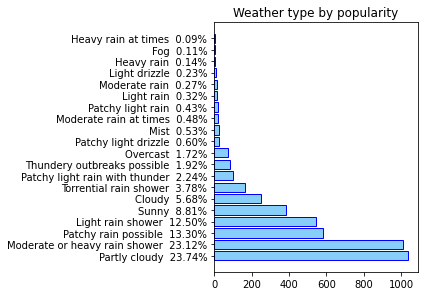

In [21]:
total = len(weather_df)
langs = weather.index
percent = weather/total*100
new_labels = [i+'  {:.2f}%'.format(j) for i, j in zip(langs, percent)]

plt.barh(langs, weather, color='lightskyblue', edgecolor='blue')
plt.yticks(range(len(langs)), new_labels)
plt.tight_layout()
plt.title('Weather type by popularity')
plt.show()

##### Remarks about general weather in Ho Chi Minh City
- The most popular weather are Partly cloudy and Moderate or heavy rain shower
- Patchy rain, light rain shower and sunny also usually appear

In [22]:
weather_df.groupby('Weather').agg('mean').sort_values(by = "Mean")

Mean        Max        Min       Wind  \
Weather                                                                      
Heavy rain                      24.604167  25.833333  23.666667  14.333333   
Moderate rain                   24.708333  26.250000  23.416667   9.250000   
Light rain                      25.535714  28.071429  23.857143   9.000000   
Patchy light rain               25.552632  27.631579  23.684211   8.842105   
Fog                             25.600000  28.200000  23.600000   6.600000   
Mist                            25.750000  29.000000  23.173913   8.478261   
Light drizzle                   25.825000  28.600000  23.500000   9.800000   
Patchy light drizzle            25.875000  29.192308  23.384615   8.423077   
Moderate rain at times          27.166667  30.380952  24.142857   9.142857   
Heavy rain at times             27.375000  30.750000  24.750000  11.500000   
Sunny                           27.388961  33.537662  23.062338   9.716883   
Overcast                        27.441667  31.280000  24.653333   9.866667   
Light rain shower               27.651099  31.417582  24.970696   8.932234   
Torrential rain shower          27.671970  31.466667  25.187879   9.515152   
Moderate or heavy rain shower   27.836262  31.719802  25.142574   9.206931   
Cloudy                          27.869960  32.463710  24.500000   9.125000   
Patchy rain possible            27.958692  32.605852  24.698795   8.209983   
Patchy light rain with thunder  28.234694  32.306122  25.275510   8.561224   
Partly cloudy                   28.340164  33.675988  24.428158   9.587271   
Thundery outbreaks possible     28.941964  32.952381  26.035714   8.440476   

                                     Rain   Humidity      Cloud     Pressure  
Weather                                                                       
Heavy rain                      55.550000  90.333333  82.666667  1007.666667  
Moderate rain                    8.166667  89.833333  68.833333  1008.833333  
Light rain                       3.250000  84.642857  66.857143  1008.857143  
Patchy light rain                5.468421  88.736842  62.736842  1008.473684  
Fog                              1.000000  93.000000  73.200000  1007.000000  
Mist                             1.343478  88.217391  54.956522  1007.956522  
Light drizzle                    2.120000  85.300000  62.900000  1008.300000  
Patchy light drizzle             1.100000  80.384615  52.461538  1009.269231  
Moderate rain at times           4.004762  76.761905  60.904762  1009.142857  
Heavy rain at times             23.900000  78.250000  68.250000  1008.750000  
Sunny                            0.041299  62.992208  10.909091  1011.187013  
Overcast                         0.704000  73.493333  55.320000  1009.413333  
Light rain shower                3.409341  78.611722  51.710623  1008.597070  
Torrential rain shower          15.436970  81.103030  53.157576  1008.084848  
Moderate or heavy rain shower    8.153168  80.335644  48.065347  1008.227723  
Cloudy                           0.417742  70.362903  41.532258  1009.887097  
Patchy rain possible             1.822031  75.321859  34.953528  1009.297762  
Patchy light rain with thunder   3.810204  79.602041  37.346939  1008.367347  
Partly cloudy                    0.221119  66.228544  24.612343  1010.429122  
Thundery outbreaks possible      1.592857  76.107143  40.976190  1008.321429

## 2.2.Numeric Type

In [23]:
weather_df.describe()

Mean          Max          Min         Wind         Rain  \
count  4369.000000  4369.000000  4369.000000  4369.000000  4369.000000   
mean     27.864929    32.385901    24.637446     9.160906     3.537835   
std       1.708788     2.420124     1.761131     3.404905     6.243244   
min      21.250000    22.000000    16.000000     2.000000     0.000000   
25%      26.750000    31.000000    24.000000     7.000000     0.000000   
50%      27.750000    32.000000    25.000000     9.000000     1.300000   
75%      29.000000    34.000000    26.000000    11.000000     4.800000   
max      33.875000    39.000000    30.000000    26.000000   136.700000   

          Humidity        Cloud     Pressure  
count  4369.000000  4369.000000  4369.000000  
mean     73.963149    37.939574  1009.325933  
std      10.396567    18.932319     2.092956  
min      44.000000     0.000000  1002.000000  
25%      66.000000    24.000000  1008.000000  
50%      75.000000    36.000000  1009.000000  
75%      82.000000    51.000000  1011.000000  
max      97.000000   100.000000  1017.000000

<ipython-input-24-cf0d4d6e6ce8>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  weather_df.hist(ax = ax);


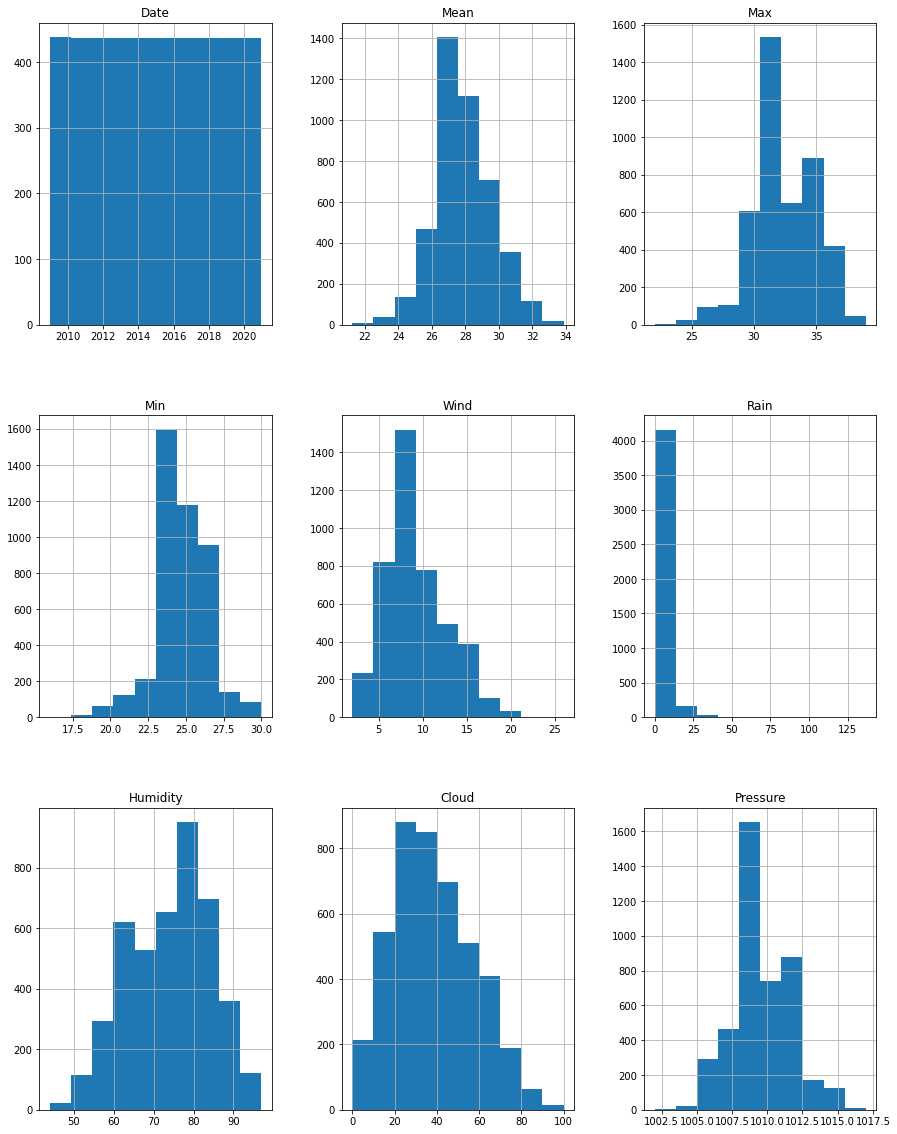

In [24]:
# Histogram of Numeric Columns
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
weather_df.hist(ax = ax);

count    4369.000000
mean        7.748455
std         2.220067
min         0.000000
25%         6.000000
50%         8.000000
75%         9.000000
max        15.000000
dtype: float64

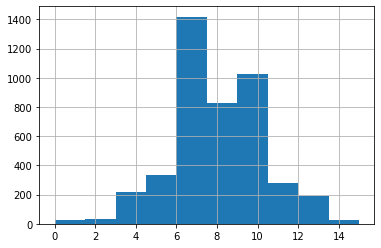

In [25]:
# Difference between max and min of temperature in a day 
delta_temp = (weather_df.Max - weather_df.Min)
delta_temp.hist()
delta_temp.describe()

**Remark**
- The difference between max and min temperature in HCMC is fairly high, mostly around 6-10°c

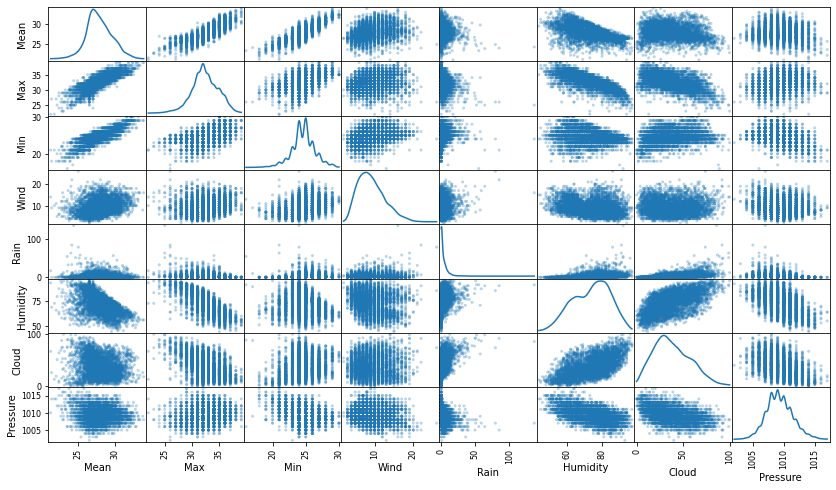

In [26]:
# Produce a scatter plots matrix for each pair of features in the data
pd.plotting.scatter_matrix(weather_df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

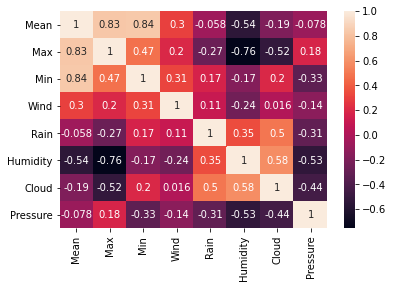

In [27]:
sns.heatmap(weather_df.corr(), annot=True);

Visualize timeseries pattern of 8 numeric attributes by monthly frequency

In [28]:
features  = ['Mean', 'Max', 'Min', 'Wind', 'Rain', 'Humidity', 'Cloud', 'Pressure']

In [29]:
weather_df = weather_df.set_index('Date')
weather_df.index

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14',
               '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18',
               '2020-12-19', '2020-12-20'],
              dtype='datetime64[ns]', name='Date', length=4369, freq=None)

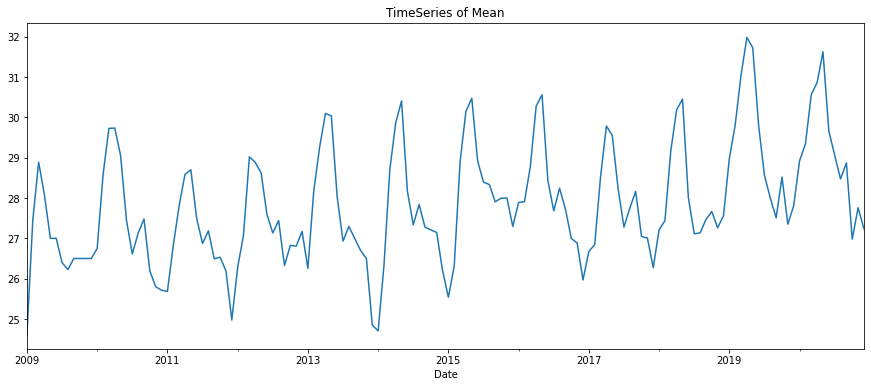

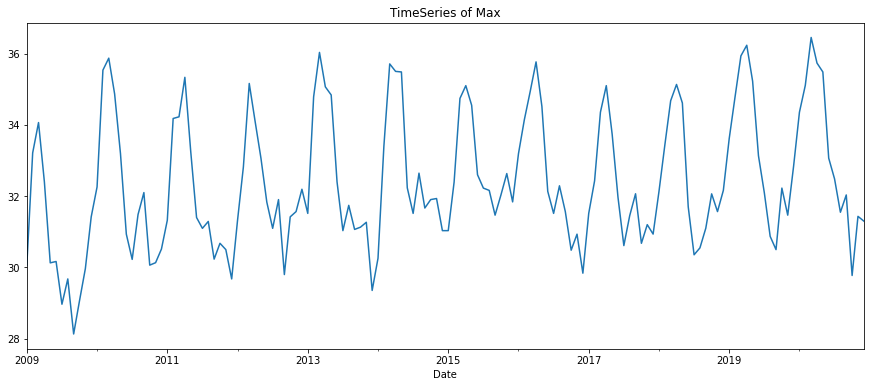

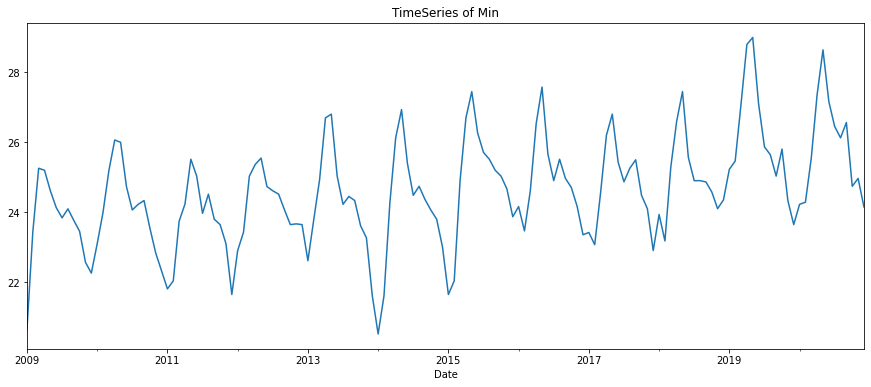

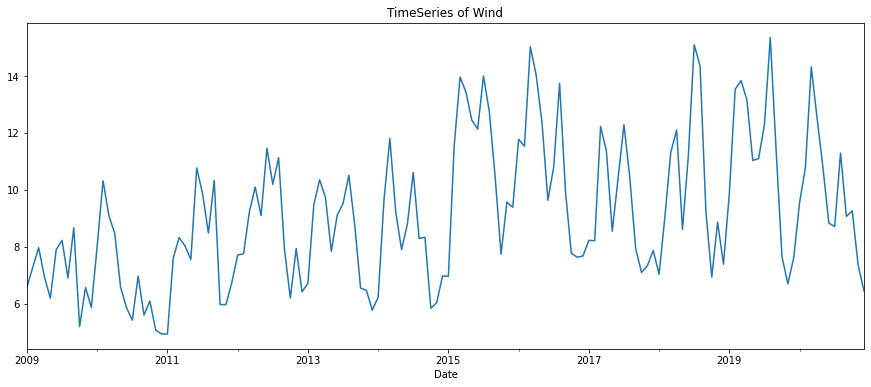

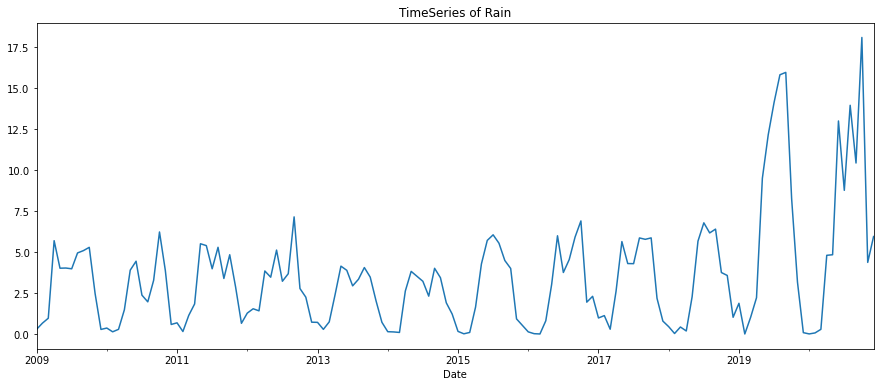

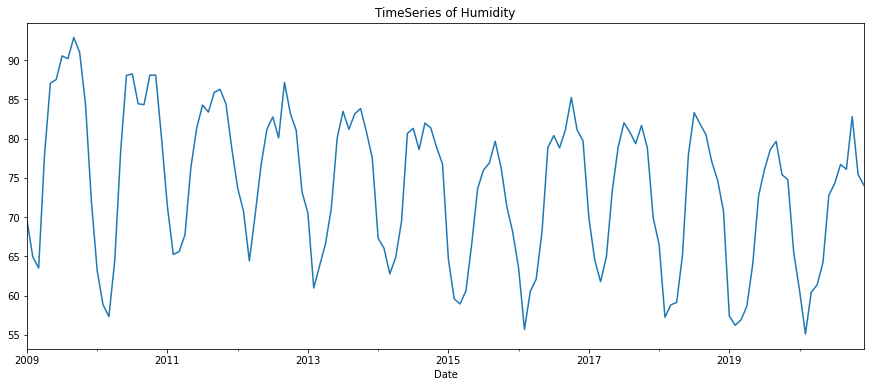

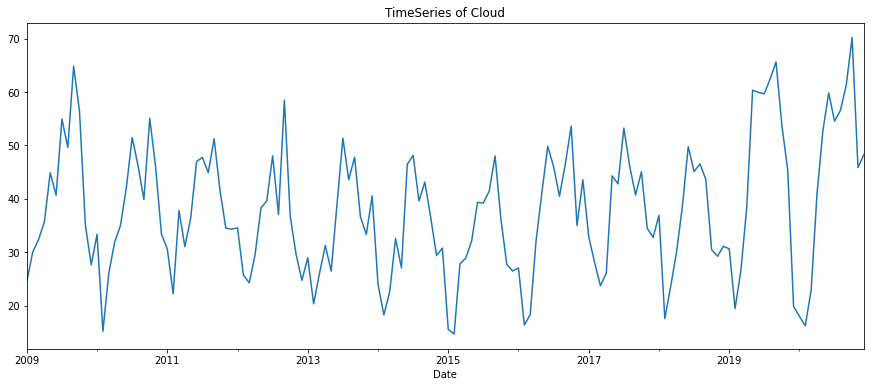

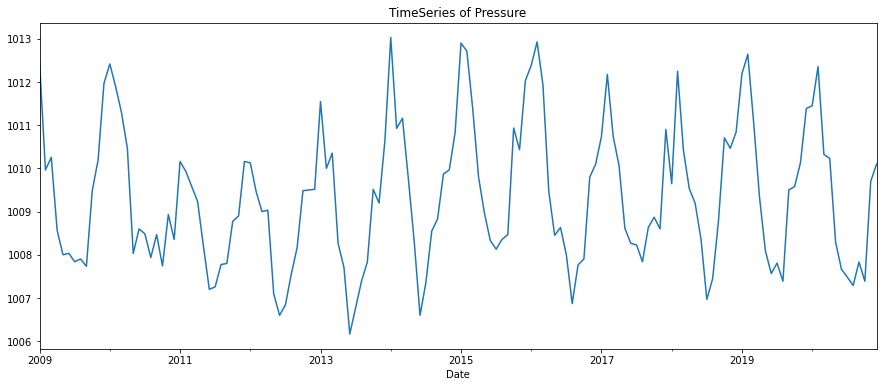

In [30]:
# weather_df.Mean[2017:].plot()
# how = 'MS' => MS: month start frequency
for feature in features:
  y = weather_df[feature].resample('MS').mean()
  y.plot(figsize=(15, 6))
  plt.title("TimeSeries of %s"%feature)
  plt.show()

#### Remarks
- Histogram of all columns are normal, except Rain column. Rain distribution of HCMC is left-skewed.
- Diferrence of max and min of temperature in a day of HCM mostly ranges from 6 to 10°C.
- Some significant correlations:
    - `Mean` bears a strongly positive relationship with max and min temperature and have a moderately negative relationship with cloudiness. 
    - `Wind` bears a weakly to moderately positive relationship with the three attributes of temperature, while `humidity` somewhat negatively correlates with them.
    - `Cloud` correlates with rain and humidity in a moderate and positive way.
    - `Pressure` bears a moderately negative relationship with humidity, rain and cloudiness, which conforms to physical properties of pressure. In physics, low pressure enables the air mass to hold more water at high altitudes *(increase relative humidity)* and hence is more likely to *form clouds and cause rainfall*.

- **Note**: Our choice of correlation coefficient threshold derives from the paper cited in the references:
    - $0$: no linear relationship
    - $1$: perfect (+/-) linear relationship
    - $(0; 0.3)$: weak (+/-) linear relationship
    - $[0.3; 0.7)$: moderate (+/-) linear relationship
    - $[0.7; 1)$: strong (+/-) linear relationship
    
- All numerical values follow pattern by half a year.

# 3. Model

## 3.1. Data preparation

#### Feature selection

In [31]:
features  = ['Mean', 'Max', 'Min', 'Wind', 'Rain', 'Humidity', 'Cloud', 'Pressure']

In [32]:
prediction_features = ['Mean_1', 'Mean_2', 'Mean_3', 'Max_1', 'Max_2', 'Max_3', 'Min_1',
       'Min_2', 'Min_3', 'Wind_1', 'Wind_2', 'Wind_3', 'Rain_1', 'Rain_2',
       'Rain_3', 'Humidity_1', 'Humidity_2', 'Humidity_3', 'Cloud_1',
       'Cloud_2', 'Cloud_3', 'Pressure_1', 'Pressure_2', 'Pressure_3']

In [33]:
df = weather_df[features]
df.head()

Mean   Max   Min  Wind  Rain  Humidity  Cloud  Pressure
Date                                                                 
2009-01-01  24.500  28.0  22.0   6.0   5.2      89.0   74.0    1010.0
2009-01-02  24.000  28.0  21.0   9.0   0.1      83.0   59.0    1011.0
2009-01-03  22.375  24.0  21.0   6.0   2.2      88.0   64.0    1012.0
2009-01-04  23.375  28.0  20.0   4.0   0.0      83.0   40.0    1011.0
2009-01-05  24.875  30.0  21.0   5.0   0.0      77.0   28.0    1011.0

#### Extract features
We propose to use climate information of the past $N$ days to predict mean temperature of the current day. 

In [34]:
def extract_feature_nth_day(df, feature, N):
    rows = df.shape[0]
    nth_prior_meassurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_meassurements

In our project, we choose $N=3$

In [35]:
for feature in features:
    for N in range(1, 4):
        extract_feature_nth_day(df, feature, N)

<ipython-input-34-912509aac4bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = nth_prior_meassurements


In [36]:
df.head()

Mean   Max   Min  Wind  Rain  Humidity  Cloud  Pressure  Mean_1  \
Date                                                                            
2009-01-01  24.500  28.0  22.0   6.0   5.2      89.0   74.0    1010.0     NaN   
2009-01-02  24.000  28.0  21.0   9.0   0.1      83.0   59.0    1011.0  24.500   
2009-01-03  22.375  24.0  21.0   6.0   2.2      88.0   64.0    1012.0  24.000   
2009-01-04  23.375  28.0  20.0   4.0   0.0      83.0   40.0    1011.0  22.375   
2009-01-05  24.875  30.0  21.0   5.0   0.0      77.0   28.0    1011.0  23.375   

            Mean_2  ...  Rain_3  Humidity_1  Humidity_2  Humidity_3  Cloud_1  \
Date                ...                                                        
2009-01-01     NaN  ...     NaN         NaN         NaN         NaN      NaN   
2009-01-02     NaN  ...     NaN        89.0         NaN         NaN     74.0   
2009-01-03  24.500  ...     NaN        83.0        89.0         NaN     59.0   
2009-01-04  24.000  ...     5.2        88.0        83.0        89.0     64.0   
2009-01-05  22.375  ...     0.1        83.0        88.0        83.0     40.0   

            Cloud_2  Cloud_3  Pressure_1  Pressure_2  Pressure_3  
Date                                                              
2009-01-01      NaN      NaN         NaN         NaN         NaN  
2009-01-02      NaN      NaN      1010.0         NaN         NaN  
2009-01-03     74.0      NaN      1011.0      1010.0         NaN  
2009-01-04     59.0     74.0      1012.0      1011.0      1010.0  
2009-01-05     64.0     59.0      1011.0      1012.0      1011.0  

[5 rows x 32 columns]

In [37]:
df_filtered = df[prediction_features + ["Mean"]]
df_filtered = df_filtered.dropna()

#### Mini EDA

In [38]:
df_filtered.corr()[['Mean']].sort_values('Mean')

Mean
Humidity_1 -0.505245
Humidity_2 -0.484450
Humidity_3 -0.478152
Cloud_1    -0.144927
Cloud_2    -0.106260
Cloud_3    -0.085887
Pressure_1 -0.052377
Pressure_2 -0.048324
Pressure_3 -0.047369
Rain_1     -0.040217
Rain_2     -0.012250
Rain_3      0.003531
Wind_1      0.311741
Wind_2      0.343600
Wind_3      0.356679
Max_3       0.635758
Max_2       0.668252
Min_3       0.706319
Min_2       0.729658
Max_1       0.730371
Min_1       0.771267
Mean_3      0.810317
Mean_2      0.845229
Mean_1      0.908525
Mean        1.000000

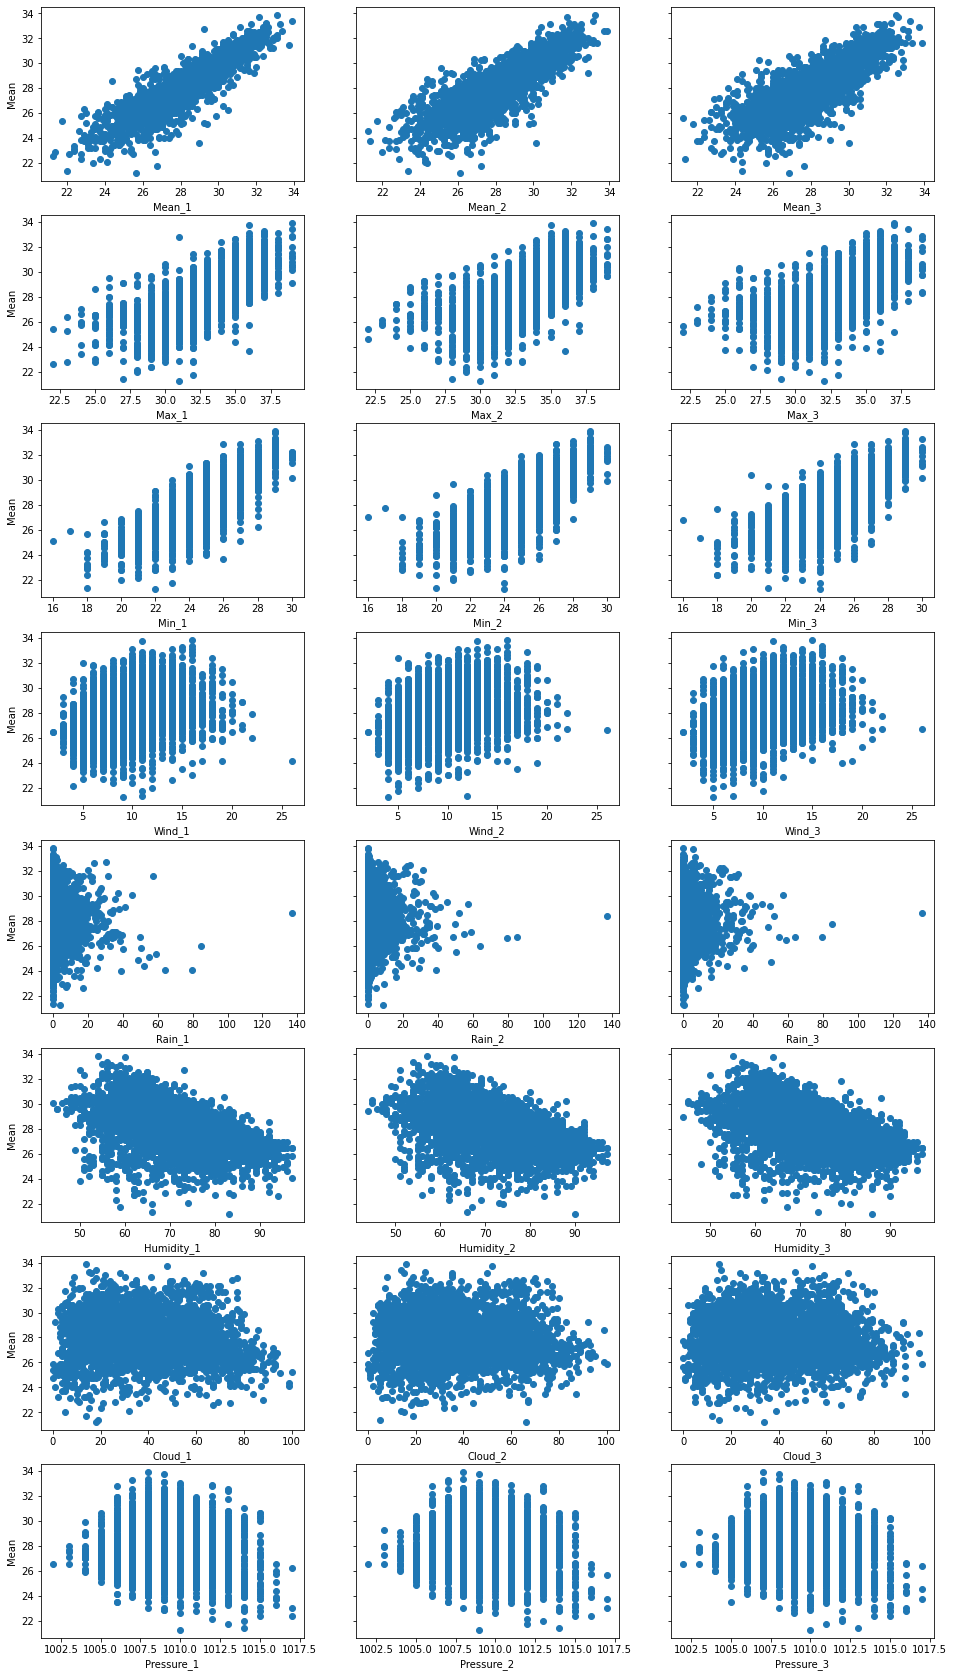

In [39]:
plt.rcParams['figure.figsize'] = [16, 30]
fig, axes = plt.subplots(nrows=8, ncols=3, sharey=True)
arr = np.array(prediction_features).reshape(8, 3)
for row, col_arr in enumerate(arr):
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df_filtered[feature], df_filtered['Mean'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='Mean')
        else:
            axes[row, col].set(xlabel=feature)
plt.show()

#### Split data
We split data train and test by day 01/04/2019, which means the data between 01/01/2009 and 01/04/2019 is used for training and the remaining is used for testing.

The choice of 01/04/2019 decides the ratio of training to testing approximates $85:15$

In [40]:
data_train = df_filtered[df_filtered.index < dt.datetime(2019,4,1)]
data_test = df_filtered[df_filtered.index >= dt.datetime(2019,4,1)]

In [41]:
X_train, y_train = data_train[prediction_features], data_train['Mean']
X_test, y_test = data_test[prediction_features], data_test['Mean']

In [42]:
X_train.head()

Mean_1  Mean_2  Mean_3  Max_1  Max_2  Max_3  Min_1  Min_2  Min_3  \
Date                                                                           
2009-01-04  22.375  24.000  24.500   24.0   28.0   28.0   21.0   21.0   22.0   
2009-01-05  23.375  22.375  24.000   28.0   24.0   28.0   20.0   21.0   21.0   
2009-01-06  24.875  23.375  22.375   30.0   28.0   24.0   21.0   20.0   21.0   
2009-01-07  25.500  24.875  23.375   31.0   30.0   28.0   22.0   21.0   20.0   
2009-01-08  25.625  25.500  24.875   31.0   31.0   30.0   23.0   22.0   21.0   

            Wind_1  ...  Rain_3  Humidity_1  Humidity_2  Humidity_3  Cloud_1  \
Date                ...                                                        
2009-01-04     6.0  ...     5.2        88.0        83.0        89.0     64.0   
2009-01-05     4.0  ...     0.1        83.0        88.0        83.0     40.0   
2009-01-06     5.0  ...     2.2        77.0        83.0        88.0     28.0   
2009-01-07     5.0  ...     0.0        77.0        77.0        83.0     28.0   
2009-01-08     5.0  ...     0.0        81.0        77.0        77.0     28.0   

            Cloud_2  Cloud_3  Pressure_1  Pressure_2  Pressure_3  
Date                                                              
2009-01-04     59.0     74.0      1012.0      1011.0      1010.0  
2009-01-05     64.0     59.0      1011.0      1012.0      1011.0  
2009-01-06     40.0     64.0      1011.0      1011.0      1012.0  
2009-01-07     28.0     40.0      1011.0      1011.0      1011.0  
2009-01-08     28.0     28.0      1012.0      1011.0      1011.0  

[5 rows x 24 columns]

In [43]:
y_train.head(5)

Date
2009-01-04    23.375
2009-01-05    24.875
2009-01-06    25.500
2009-01-07    25.625
2009-01-08    24.375
Name: Mean, dtype: float64

## 3.2. Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [46]:
lr_pred[:5]

array([30.26653073, 30.92608222, 31.35796836, 30.81136692, 29.76652036])

In [47]:
print(f"Training r-squared score of Linear regression: {lr.score(X_train, y_train)}")

Training r-squared score of Linear regression: 0.8418027664885122


In [48]:
print(f"Testing r-squared score of Linear regression: {lr.score(X_test, y_test)}")

Testing r-squared score of Linear regression: 0.7457702254063487


## 3.3. SVM
We will use SVR (Support Vector Regression) for regression problems
- After some experiments, we find out that using an SVR with `polynomial kernel` yields the best result.
- More details of our benchmarks can be found in Column 6. Appendix

In [49]:
from sklearn.svm import SVR

In [73]:
svr = SVR(kernel='poly', C=1e4, degree=2)
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [74]:
svr_pred[:5]

array([30.45752296, 30.80125634, 31.52777145, 30.9163881 , 29.83174428])

In [75]:
print(f"Training r-squared score of SVR with polynomial kernel: {svr.score(X_train, y_train)}")

Training r-squared score of SVR with polynomial kernel: 0.840221760970194


In [53]:
print(f"Testing r-squared score of SVR with polynomial kernel: {svr.score(X_test, y_test)}")

Testing r-squared score of SVR with polynomial kernel: 0.7513070133190087


## 3.4. Ensemble Model
We create an ensemble model of the above models: Linear Regression and SVR with the hope of improving our prediction scores

In [54]:
class EnsembleModel:
    def __init__(self):
        self.model1 = LinearRegression()
        self.model2 = SVR(kernel='poly', C=1e4, degree=2)

    def fit(self, X, y):
        self.model1.fit(X, y)
        self.model2.fit(X, y)    
  
    def predict(self, X):
        pred1 = self.model1.predict(X)
        pred2 = self.model2.predict(X)
        pred = (pred1 + pred2)/2
        return pred

In [55]:
ensemble_model = EnsembleModel()
ensemble_model.fit(X_train, y_train)
ens_pred = ensemble_model.predict(X_test)

In [56]:
ens_pred[:5]

array([30.36202685, 30.86366928, 31.44286991, 30.86387751, 29.79913232])

# 4. Evaluation

We will use 4 main regression model evaluation metrics to assess prediction error rates and model performance:
- MAE (mean absolute error)
- MSE (mean squared error)
- RMSE (root mean squared error)
- R-squared (coefficient of determination): how well the predicted values fit the ground truths. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [57]:
import sklearn.metrics as metrics
def evaluation(obs, prediction):
    mse = metrics.mean_squared_error(obs, prediction)
    rmse = metrics.mean_squared_error(obs, prediction, squared=False)
    mae = metrics.mean_absolute_error(obs, prediction)
    r_square = metrics.r2_score(obs, prediction)
    print("Mean Square Error: %0.2f" %mse)
    print("Root Mean Square Error: %0.2f" %rmse)
    print("Mean Absolute Error: %0.2f" %mae)
    print("R2 score: %0.2f" %r_square)

In [58]:
# Linear Regression 
print("== Linear regression ==")
evaluation(y_test, lr_pred)

== Linear regression ==
Mean Square Error: 0.87
Root Mean Square Error: 0.93
Mean Absolute Error: 0.68
R2 score: 0.75


In [59]:
# SVM 
print("== SVR ==")
evaluation(y_test, svr_pred)

== SVR ==
Mean Square Error: 0.85
Root Mean Square Error: 0.92
Mean Absolute Error: 0.67
R2 score: 0.75


In [60]:
# Ensemble Model
print("== Ensemble model ==")
evaluation(y_test, ens_pred)

== Ensemble model ==
Mean Square Error: 0.86
Root Mean Square Error: 0.93
Mean Absolute Error: 0.68
R2 score: 0.75


### Test case

In [61]:
print(f"Choose a test case: {pd.to_datetime(X_test.iloc[-1].name).date()}")

Choose a test case: 2020-12-20


In [62]:
test_case = [X_test.iloc[-1]]
print(f"Predicted mean temperature of {pd.to_datetime(X_test.iloc[-1].name).date()}: {lr.predict(test_case).item():.2f} °c")
print(f"Real mean temperature of {pd.to_datetime(X_test.iloc[-1].name).date()}: {y_test.iloc[-1]:.2f} °c")

Predicted mean temperature of 2020-12-20: 27.60 °c
Real mean temperature of 2020-12-20: 26.50 °c


# 5. Conclusion

In our project, we have collected data with HTML parsing, cleaned and extracted some insights of weather in Ho Chi Minh City and climate data in general:
- The rain distribution is left-skewed, which denotes it does not tend to rain too heavily in HCM City
- The difference between maximum and minimum temperature of a day in HCMC is fairly high and mostly ranges from 6 to 10°C
- Pressure, cloudiness, rainfall and humidity follow the law of physics. Higher percentage of cloud coverness strongly correlates the overall temperature. 


In terms of data modelling, we have built 3 machine learning models for temperature prediction, which all achieved R2-score of up to $75\%$. Also, in our experiments, we found that SVR with polynomial kernel achieved a slightly higher score than Linear Regression. 

In the future, we plan to implement GridSearch to find the best estimator for SVR. Due to its long running time, our current project will only present the tuning directions in the Appendix column


# 6. Appendix
Some of the experiments we have conducted do not give good results, so we include them in the appendix column for the purpose of benchmarking only

**Note:** A negative value of R2-score indicates a bad model, the closer to -1 the worse our model is

In [77]:
# SVR with rbf kernel
svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.1)

svr_rbf.fit(X_train, y_train)
svr_rbf_pred = svr_rbf.predict(X_test)

In [78]:
print(f"Training r-squared score of SVR with rbf kernel: {svr_rbf.score(X_train, y_train)}")
print(f"Testing r-squared score of SVR with rbf kernel: {svr_rbf.score(X_test, y_test)}")

Training r-squared score of SVR with rbf kernel: 0.9961662799644347
Testing r-squared score of SVR with rbf kernel: -0.600480704046066


In [79]:
# SVR with sigmoid kernel
svr_sigmoid = SVR(kernel='sigmoid', C=1e4, gamma=0.1)

svr_sigmoid.fit(X_train, y_train)
svr_sigmoid_pred = svr_sigmoid.predict(X_test)

In [80]:
print(f"Training r-squared score of SVR with sigmoid kernel: {svr_sigmoid.score(X_train, y_train)}")
print(f"Testing r-squared score of SVR with sigmoid kernel: {svr_sigmoid.score(X_test, y_test)}")

Training r-squared score of SVR with sigmoid kernel: -0.007183992809405959
Testing r-squared score of SVR with sigmoid kernel: -0.7277136689814518


### Hyperparameter tuning 
Use `GridSearchCV` in sklearn library

**SVR with rbf kernel**: Optimize with sufficiently large `C` and low `gamma`

**SVR with sigmoid kernel**: Optimize with sufficiently large `C` and low `gamma` 

**SVR with polynomial kernel**: Optimize with sufficiently large `C` and low `degree` 

# 7. References
- [Threshold for Pearson correlation coefficient](https://link.springer.com/article/10.1057/jt.2009.5#:~:text=%E2%88%921%20indicates%20a%20perfect%20negative,through%20an%20exact%20linear%20rule.&text=Values%20between%200%20and%200.3,through%20a%20shaky%20linear%20rule.)
- [Pandas Resample Documentation](https://stackoverflow.com/questions/17001389/pandas-resample-documentation)
- [Modelling with SVM](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/svm/plot_svm_regression.html)
- [Hyperparameter tuning](https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/)
- [RBF Kernel](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)